### LIBRARIES :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

### READ THE DATASET :

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Features
For the rest of the homework, you'll need to use only these columns:
age,job,marital,education,balance,housing,contact,day,month,duration,campaign,
pdays,previous,poutcome,y

In [4]:
columns_to_drop = ['default', 'loan']
df = df.drop(columns=columns_to_drop)
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset preparation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [6]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,0
housing,0
contact,0
day,0
month,0
duration,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(45211, 15)

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [11]:
df.nunique()

,0
age,77
job,12
marital,3
education,4
balance,7168
housing,2
contact,3
day,31
month,12
duration,1573


In [12]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
balance,int64
housing,object
contact,object
day,int64
month,object
duration,int64


### Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [13]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [14]:
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


In [15]:
seed = 1
d_test = 0.2
d_val = 0.2

df_full_train, df_test = train_test_split(df.drop(columns="y"), test_size=d_test, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=d_val, random_state=seed)

print(f'Shape of full training set: {df_full_train.shape}')
print(f'Shape of validation set: {df_val.shape}')
print(f'Shape of test set: {df_test.shape}')

Shape of full training set: (36168, 14)
Shape of validation set: (7234, 14)
Shape of test set: (9043, 14)


### Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.
Let's do that

•	For each numerical variable, use it as score and compute AUC with the y variable

•	Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front
(e.g. -df_train['engine_hp'])
AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

•	balance

•	day

•	duration

•	previous


In [16]:
df_train_full = df_train.copy()
df_train_full['y'] = df['y'].loc[df_train.index]

auc_values = {}
for var in ['balance', 'day', 'duration', 'previous']:
    score = roc_auc_score(df_train_full['y'], df_train_full[var])
    if score < 0.5:
        score = roc_auc_score(df_train_full['y'], -df_train_full[var])
    auc_values[var] = score
    print(f"AUC за {var}: {score}")

AUC за balance: 0.5899473804882456
AUC за day: 0.5266972296878812
AUC за duration: 0.8142915057456301
AUC за previous: 0.5993297719838377


In [17]:
max_auc_var = max(auc_values, key=auc_values.get)
print(f"The variable with the highest AUC is: {max_auc_var} with AUC: {auc_values[max_auc_var]}")

The variable with the highest AUC is: duration with AUC: 0.8142915057456301


### Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

•	0.69

•	0.79

•	0.89

•	0.99


In [18]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
val_dict = df_val[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
y_train = df['y'].loc[df_train.index].values
y_val = df['y'].loc[df_val.index].values

In [19]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [20]:
y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"AUC on validation set: {auc:.3f}")

AUC on validation set: 0.899


### Question 3: Precision and Recall
Now let's compute precision and recall for our model.
•	Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
•	For each threshold, compute precision and recall
•	Plot them
At which threshold precision and recall curves intersect?

•	0.265

•	0.465

•	0.665

•	0.865


In [21]:
thresholds = np.arange(0.0, 1.0, 0.01)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred_threshold = (y_pred >= threshold).astype(int)

    precision = precision_score(y_val, y_pred_threshold)
    recall = recall_score(y_val, y_pred_threshold)

    precisions.append(precision)
    recalls.append(recall)

precisions = np.array(precisions)
recalls = np.array(recalls)

In [22]:
difference = precisions - recalls

intersection_indices = np.where(np.diff(np.sign(difference)))[0]

if intersection_indices.size > 0:
    intersection_threshold = (thresholds[intersection_indices] + thresholds[intersection_indices + 1]) / 2
    print(f'Threshold where precision and recall curves intersect: {intersection_threshold[0]:.3f}')
else:
    print('No intersection found within the thresholds.')

Threshold where precision and recall curves intersect: 0.265


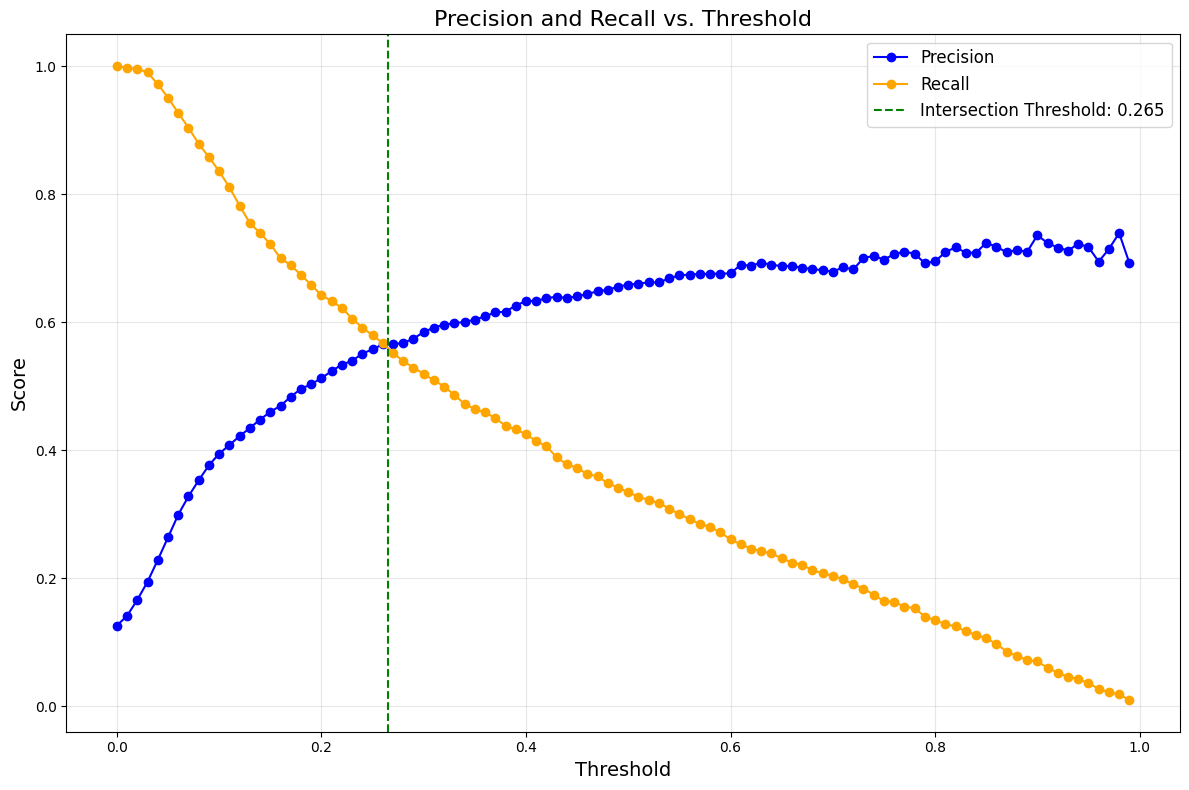

In [23]:
plt.figure(figsize=(12, 8))

plt.plot(thresholds, precisions, label='Precision', marker='o', color='blue', linestyle='-', markersize=6)

plt.plot(thresholds, recalls, label='Recall', marker='o', color='orange', linestyle='-', markersize=6)

if intersection_indices.size > 0:
    plt.axvline(x=intersection_threshold[0], color='green', linestyle='--', label=f'Intersection Threshold: {intersection_threshold[0]:.3f}')

plt.title('Precision and Recall vs. Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)

plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both
This is the formula for computing F1:
F1=2⋅P⋅RP+R
Where P is precision and R is recall.
Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01
At which threshold F1 is maximal?

•	0.02

•	0.22

•	0.42

•	0.62

In [24]:
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred >= threshold).astype(int)

    precision = precision_score(y_val, y_pred_threshold)
    recall = recall_score(y_val, y_pred_threshold)

    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1_scores.append(f1)

f1_scores = np.array(f1_scores)

max_f1_index = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_index]
max_f1_value = f1_scores[max_f1_index]

print(f'Threshold with maximum F1 score: {max_f1_threshold:.2f} with F1 score: {max_f1_value:.3f}')

Threshold with maximum F1 score: 0.22 with F1 score: 0.575


### Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
KFold(n_splits=5, shuffle=True, random_state=1)
•	Iterate over different folds of df_full_train
•	Split the data into train and validation
•	Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
•	Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

•	0.0001

•	0.006

•	0.06

•	0.26

In [25]:
X_full_train = dv.fit_transform(df_full_train[categorical + numerical].to_dict(orient='records'))
y_full_train = df['y'].loc[df_full_train.index].values

kf = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

for train_index, val_index in kf.split(X_full_train):
    X_train, X_val = X_full_train[train_index], X_full_train[val_index]
    y_train, y_val = y_full_train[train_index], y_full_train[val_index]

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)
    print(f'AUC for this fold: {auc:.3f}')

std_auc = np.std(auc_scores)
print(f'Standard deviation of AUC scores: {std_auc:.3f}')

AUC for this fold: 0.899
AUC for this fold: 0.899
AUC for this fold: 0.911
AUC for this fold: 0.908
AUC for this fold: 0.912
Standard deviation of AUC scores: 0.006


### Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C
•	Iterate over the following C values: [0.000001, 0.001, 1]
•	Initialize KFold with the same parameters as previously
•	Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
•	Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

•	0.000001

•	0.001

•	1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [26]:
C_values = [0.000001, 0.001, 1]
kf = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = {}

for C in C_values:
    fold_auc_scores = []

    for train_index, val_index in kf.split(X_full_train):
        X_train, X_val = X_full_train[train_index], X_full_train[val_index]
        y_train, y_val = y_full_train[train_index], y_full_train[val_index]

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        fold_auc_scores.append(auc)

    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)

    auc_scores[C] = (mean_auc, std_auc)

    print(f'C: {C}, Mean AUC: {mean_auc:.4f}, Std AUC: {std_auc:.4f}')

C: 1e-06, Mean AUC: 0.7014, Std AUC: 0.0094
C: 0.001, Mean AUC: 0.8608, Std AUC: 0.0072
C: 1, Mean AUC: 0.9059, Std AUC: 0.0057


In [27]:
best_c = None
best_mean_auc = -np.inf
best_std_auc = np.inf

for C, (mean_auc, std_auc) in auc_scores.items():
    if (mean_auc > best_mean_auc) or (mean_auc == best_mean_auc and std_auc < best_std_auc) or (mean_auc == best_mean_auc and std_auc == best_std_auc and (best_c is None or C < best_c)):
        best_mean_auc = mean_auc
        best_std_auc = std_auc
        best_c = C

print(f'The best C is: {best_c} with Mean AUC: {best_mean_auc:.4f} and Std AUC: {best_std_auc:.4f}')

The best C is: 1 with Mean AUC: 0.9059 and Std AUC: 0.0057


### SUMMARY

In [30]:
table = PrettyTable()

table.field_names = ["Question", "Task", "Answer"]

table.add_row([
    "1. ROC AUC Feature Importance",
    "Highest AUC for the numerical variables.",
    "Variable with highest AUC: 'duration' with AUC: 0.814"
])

table.add_row([
    "2. Logistic Regression Training",
    "Train a logistic regression model on the training dataset.",
    "AUC on validation set: 0.899"
])

table.add_row([
    "3. Precision and Recall",
    "Precision and recall across different thresholds.",
    "Threshold where precision and recall curves intersect: 0.265"
])

table.add_row([
    "4. F1 Score Maximization",
    "Which threshold F1 score is max.",
    "Threshold with maximum F1 score: 0.22 with F1 score: 0.575"
])

table.add_row([
    "5. K-Fold Cross-Validation",
    "Standard deviation of the scores across different folds.",
    "Standard deviation of AUC scores: 0.006"
])

table.add_row([
    "6. Hyperparameter Tuning",
    "Regularization parameter C for logistic regression.",
    "The best C is: 1 with Mean AUC: 0.9059 and Std AUC: 0.0057"
])

# Display the table
print(table)

+---------------------------------+------------------------------------------------------------+--------------------------------------------------------------+
|             Question            |                            Task                            |                            Answer                            |
+---------------------------------+------------------------------------------------------------+--------------------------------------------------------------+
|  1. ROC AUC Feature Importance  |          Highest AUC for the numerical variables.          |    Variable with highest AUC: 'duration' with AUC: 0.814     |
| 2. Logistic Regression Training | Train a logistic regression model on the training dataset. |                 AUC on validation set: 0.899                 |
|     3. Precision and Recall     |     Precision and recall across different thresholds.      | Threshold where precision and recall curves intersect: 0.265 |
|     4. F1 Score Maximization    |     